<a href="https://colab.research.google.com/github/gsarm78/MetaSegmentation/blob/main/Clustering_SatelliteImages_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RUN with GPU enabled

Revision 3 - added t-SNE and grid t-SNE visualisations

In [1]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data are renamed with a numbered filename
!unzip /content/drive/My\ Drive/cs330Data/data2.zip -d /content/data

In [4]:
rm -r /content/data/__MACOSX

In [2]:
path = r"/content/data/train"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
images = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the images list
            images.append(file.name)

In [3]:
# load the image as a 224x224 array
img = load_img(images[0], target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)
#(224, 224, 3)

(224, 224, 3)


In [4]:
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)

(1, 224, 224, 3)


In [5]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features
   
data = {}
p = r"/content/features.pkl"

# lop through each image in the dataset
for satimage in images:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(satimage,model)
        data[satimage] = feat
    # if something fails, save the extracted features as a pickle file
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

In [6]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
feat.shape

(3903, 1, 4096)

In [7]:
feat.shape[-2]

1

In [8]:
# reshape so that there are xyz samples of 4096 vectors
feat = feat.reshape(-1,feat.shape[-1])
feat.shape

(3903, 4096)

In [9]:
########
'''
# just some basic setup for the purpose of this demo:
%matplotlib inline  
from IPython.display import display
import matplotlib.pyplot as plt

import numpy as np
from sklearn.manifold import TSNE

# generate a set of 1024 random 3D points
totalDataPoints = 1024 
dataPoints = np.random.uniform(low=0.0, high=1.0, size=(totalDataPoints,3))
#dataPoints = feat[-1]


# create a t-sne embedding in 2D
model = TSNE(n_components=2, perplexity=30, random_state=0,metric='sqeuclidean')
xy = model.fit_transform(dataPoints) 


fig = plt.figure(figsize=(10.0,10.0))
ax = fig.add_subplot(1, 1, 1)
#ax.set_axis_bgcolor('black')
#ax.getget_fc()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.autoscale_view(True,True,True)
ax.invert_yaxis()
ax.scatter(xy[:,0],xy[:,1], c = dataPoints,  edgecolors='none',marker='s',s=7.5)    
plt.show()
'''

"\n# just some basic setup for the purpose of this demo:\n%matplotlib inline  \nfrom IPython.display import display\nimport matplotlib.pyplot as plt\n\nimport numpy as np\nfrom sklearn.manifold import TSNE\n\n# generate a set of 1024 random 3D points\ntotalDataPoints = 1024 \ndataPoints = np.random.uniform(low=0.0, high=1.0, size=(totalDataPoints,3))\n#dataPoints = feat[-1]\n\n\n# create a t-sne embedding in 2D\nmodel = TSNE(n_components=2, perplexity=30, random_state=0,metric='sqeuclidean')\nxy = model.fit_transform(dataPoints) \n\n\nfig = plt.figure(figsize=(10.0,10.0))\nax = fig.add_subplot(1, 1, 1)\n#ax.set_axis_bgcolor('black')\n#ax.getget_fc()\nax.spines['top'].set_visible(False)\nax.spines['right'].set_visible(False)\nax.spines['bottom'].set_visible(False)\nax.spines['left'].set_visible(False)\nax.axes.get_xaxis().set_visible(False)\nax.axes.get_yaxis().set_visible(False)\nax.autoscale_view(True,True,True)\nax.invert_yaxis()\nax.scatter(xy[:,0],xy[:,1], c = dataPoints,  edgecolo

In [10]:
# get the unique labels 
#df = pd.read_csv('masks.csv')
#label = df['label'].tolist()
#unique_labels = list(set(label))

In [11]:
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=2, random_state=22) # pca
pca.fit(feat)
x = pca.transform(feat) #pca_features, #feat = features

In [12]:
print("original shape:   ", feat.shape)
print("transformed shape:", x.shape)

original shape:    (3903, 4096)
transformed shape: (3903, 2)


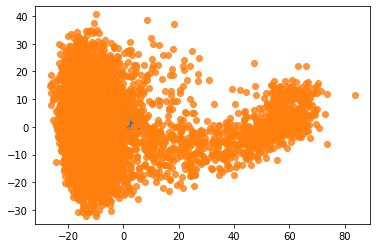

In [13]:
X_new = pca.inverse_transform(x)
plt.scatter(feat[:, 0], feat[:, 1], alpha=0.2) #original
plt.scatter(x[:, 0], x[:, 1], alpha=0.8) #transformed
plt.axis('equal');

##The light points are the original data, while the dark points are the projected version.

In [14]:
%matplotlib inline
import os
import random
import numpy as np
import json
import matplotlib.pyplot
import pickle
from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.manifold import TSNE

In [15]:
num_images_to_plot = 1000

if len(images) > num_images_to_plot:
    sort_order = sorted(random.sample(range(len(images)), num_images_to_plot))
    images = [images[i] for i in sort_order]
    x = [x[i] for i in sort_order]

In [16]:
X = np.array(x)
tsne = TSNE(n_components=2, learning_rate=200, perplexity=30, n_iter=3000, angle=0.2, verbose=2).fit_transform(X) #perplexity default to 30 --> good result

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.596384
[t-SNE] Computed conditional probabilities in 0.054s
[t-SNE] Iteration 50: error = 64.0245590, gradient norm = 0.2200138 (50 iterations in 0.893s)
[t-SNE] Iteration 100: error = 58.5804596, gradient norm = 0.1831628 (50 iterations in 0.642s)
[t-SNE] Iteration 150: error = 56.4598312, gradient norm = 0.1685822 (50 iterations in 0.656s)
[t-SNE] Iteration 200: error = 56.1582985, gradient norm = 0.1643749 (50 iterations in 0.619s)
[t-SNE] Iteration 250: error = 56.1030197, gradient norm = 0.1615871 (50 iterations in 0.599s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.103020
[t-SNE] Iteration 300: error = 0.5089713, gradient norm = 0.0005128 (50 iterations in 0.608s)
[t-SNE] Iteration 350: error = 0.4482848, gradient norm = 0.00016

In [17]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

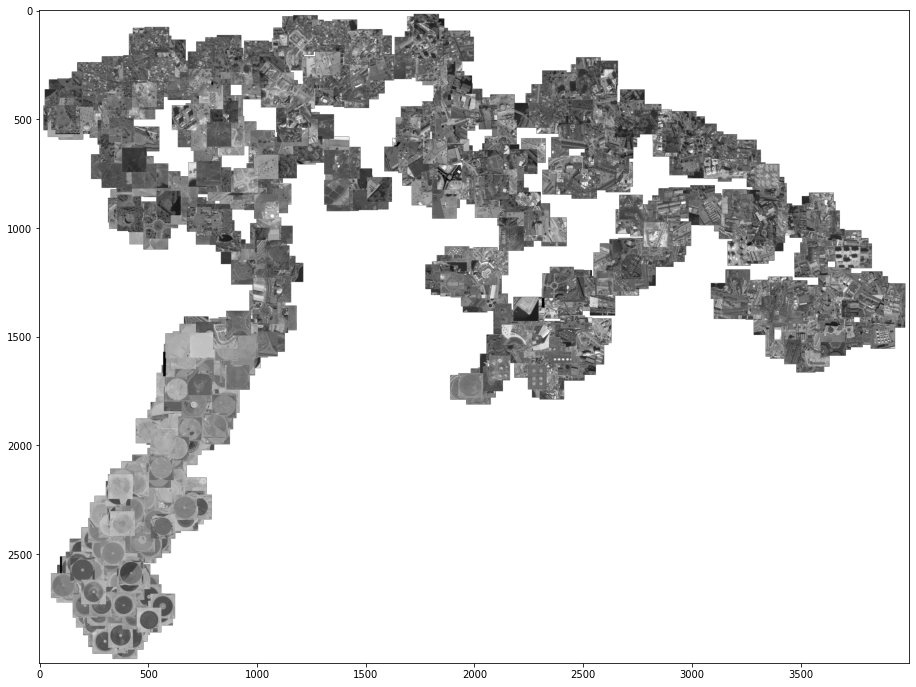

In [19]:
width = 4000
height = 3000
max_dim = 150

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(images, tx, ty):
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)

In [20]:
full_image.save("/content/tsne3_150px_1k_samples.png")

In [21]:
tsne_path = "/content/example-tSNE-points.json"

data = [{"path":os.path.abspath(img), "point":[float(x), float(y)]} for img, x, y in zip(images, tx, ty)]
with open(tsne_path, 'w') as outfile:
    json.dump(data, outfile)

print("saved t-SNE result to %s" % tsne_path)

saved t-SNE result to /content/example-tSNE-points.json


In [22]:
!git clone https://github.com/bmcfee/RasterFairy.git

Cloning into 'RasterFairy'...
remote: Enumerating objects: 138, done.
remote: Total 138 (delta 0), reused 0 (delta 0), pack-reused 138
Receiving objects: 100% (138/138), 35.31 MiB | 31.36 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [23]:
pip install rasterfairy

  Created wheel for rasterfairy: filename=rasterfairy-1.0.6-cp36-none-any.whl size=29553 sha256=1699c56e795a5279191063f8a682c55637e57eb3ad4094db67929ce759c3f52f
  Stored in directory: /root/.cache/pip/wheels/0c/f9/82/556740c5d8bea017ac9f2aa74d97fa0319a301371e23b06777
Successfully built rasterfairy


In [24]:
import rasterfairy


# nx * ny = 1000, the number of images
nx = 40
ny = 25

# assign to grid
grid_assignment = rasterfairy.transformPointCloud2D(tsne, target=(nx, ny))
#grid_assignment = rasterfairy.transformPointCloud2D(tsne)

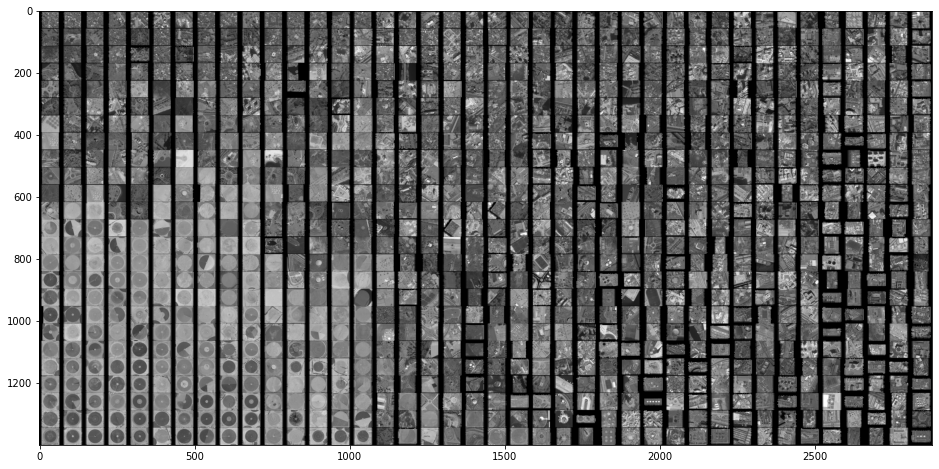

In [25]:
tile_width = 72
tile_height = 56

full_width = tile_width * nx
full_height = tile_height * ny
aspect_ratio = float(tile_width) / tile_height

grid_image = Image.new('RGB', (full_width, full_height))

for img, grid_pos in zip(images, grid_assignment[0]):
    idx_x, idx_y = grid_pos
    x, y = tile_width * idx_x, tile_height * idx_y
    tile = Image.open(img)
    tile_ar = float(tile.width) / tile.height  # center-crop the tile to match aspect_ratio
    if (tile_ar > aspect_ratio):
        margin = 0.5 * (tile.width - aspect_ratio * tile.height)
        tile = tile.crop((margin, 0, margin + aspect_ratio * tile.height, tile.height))
    else:
        margin = 0.5 * (tile.height - float(tile.width) / aspect_ratio)
        tile = tile.crop((0, margin, tile.width, margin + float(tile.width) / aspect_ratio))
    tile = tile.resize((tile_width, tile_height), Image.ANTIALIAS)
    grid_image.paste(tile, (int(x), int(y)))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(grid_image)

In [26]:
grid_image.save("/content/example-tSNE-grid.jpg")

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


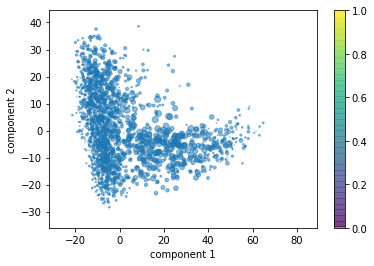

In [ ]:
plt.scatter(x[:, 0], x[:, 1], x[:, 2], c=None, edgecolor='face', alpha=0.5, cmap=None)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA


pca = PCA(n_components=3, random_state=22)
components = pca.fit_transform(feat)
#x = pca.transform(feat)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=None,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
#from sklearn.manifold import TSNE
#import time
#time_start = time.time()

#sat_tsne = TSNE(random_state=22).fit_transform(feat)


In [ ]:
# cluster feature vectors

k_value = 6

#kmeans = KMeans(n_clusters=k_value,n_jobs=-1, random_state=22) ###WORKS
kmeans = KMeans(n_clusters=k_value, init='k-means++', n_jobs=-1, random_state=22)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=22, tol=0.0001, verbose=0)

In [ ]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [ ]:
# function to view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

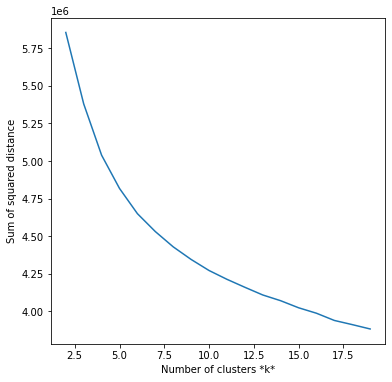

In [ ]:
# Elbow - see which value for k might be the best 
sse = []
list_k = list(range(2, 20))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22, n_jobs=-1)
    km.fit(x)
    
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

Clipping cluster size from 298 to 30


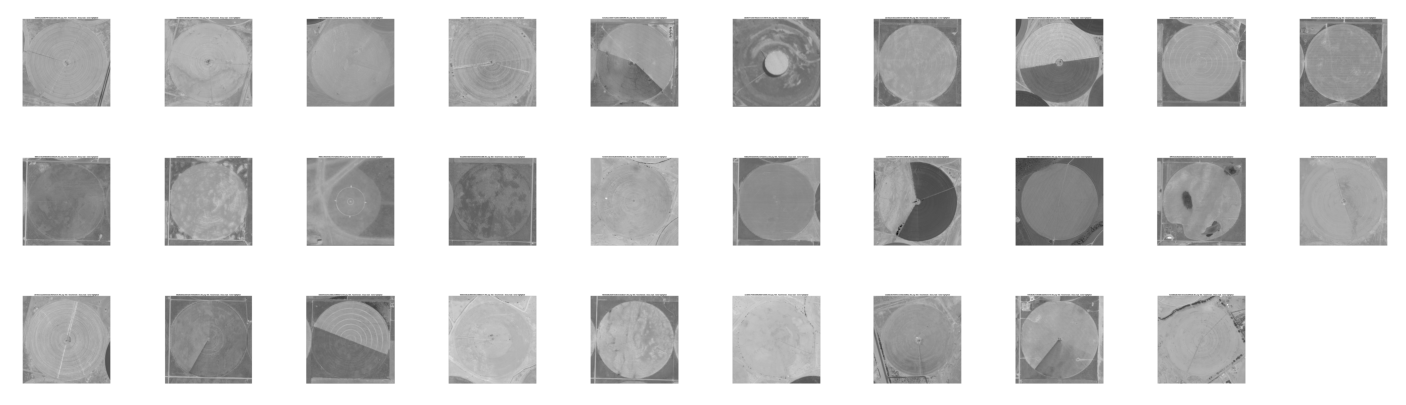

In [ ]:
#Cluster 1 
view_cluster(0)

In [ ]:
#which images (files) are within each group
groups[0]